In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

Using TensorFlow backend.


# Loading Dataset

In [12]:
true = pd.read_csv("../input/fake-and-real-news-dataset/True.csv")
false = pd.read_csv("../input/fake-and-real-news-dataset/Fake.csv")

# First 5 records

In [ ]:
true.head()

In [ ]:
false.head()

In [13]:
true['category'] = 1
false['category'] = 0

In [ ]:
true.head()

# Merging the 2 datasets

In [14]:
df = pd.concat([true,false]) 

# Check for missing values

In [15]:
df.isna().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [16]:
df.title.count()

44898

In [17]:
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [18]:
df['text'] = df['text'] + " " + df['title'] + " " + df['subject']
del df['title']
del df['subject']
del df['date']

In [19]:
df.head()

,text,category
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


# Remove noisy words from a text

In [20]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [21]:
stop

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'need

# Stemming and lemmatization

In [22]:
stemmer = PorterStemmer()
def stem_text(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            word = stemmer.stem(i.strip())
            final_text.append(word)
    return " ".join(final_text)    

In [23]:
df.text = df.text.apply(stem_text)

# Generating Word Cloud

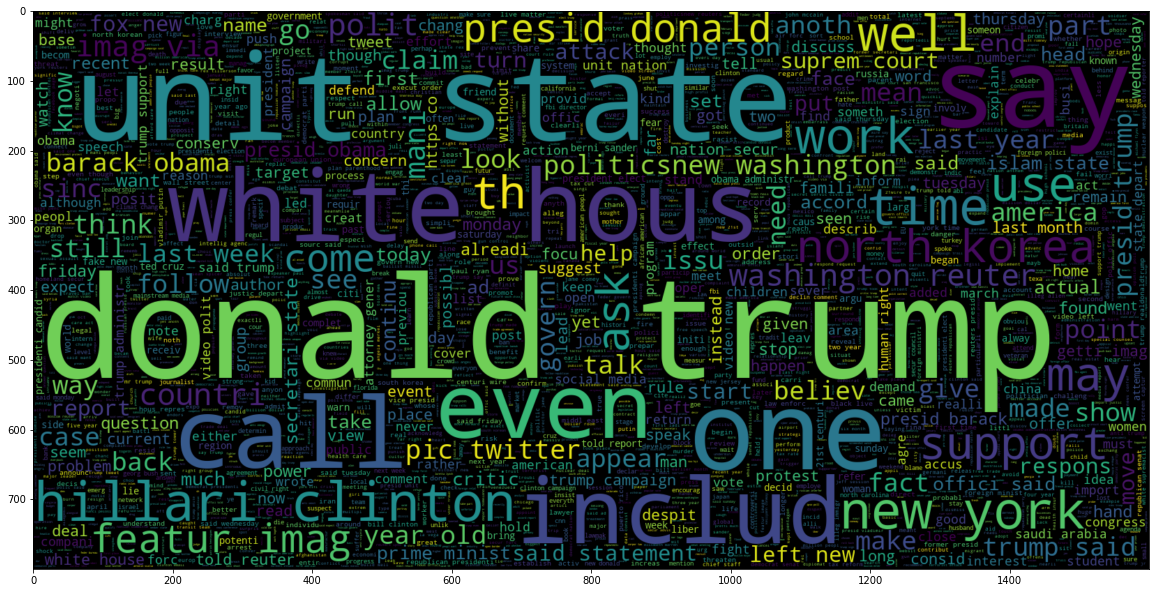

In [24]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df.text))
plt.imshow(wc , interpolation = 'bilinear')

# Spliting training and testing data

In [25]:
x_train,x_test,y_train,y_test = train_test_split(df.text,df.category)

# Text-2-Vector conversion 

In [26]:
cv=CountVectorizer(min_df=0,max_df=1,ngram_range=(1,2))
#transformed train reviews
cv_train_reviews=cv.fit_transform(x_train)
#transformed test reviews
cv_test_reviews=cv.transform(x_test)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (33673, 1960973)
BOW_cv_test: (11225, 1960973)


# Define the model

In [28]:
model = Sequential()
model.add(Dense(units = 100 , activation = 'relu' , input_dim = cv_train_reviews.shape[1]))
model.add(Dense(units = 50 , activation = 'relu'))
model.add(Dense(units = 25 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'relu'))
model.add(Dense(units = 1 , activation = 'sigmoid'))

# Compile the model

In [29]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

# Fit the model

In [30]:
model.fit(cv_train_reviews,y_train , epochs = 5)

Epoch 1/5
33673/33673 [==============================] - 554s 16ms/step - loss: 0.6921 - accuracy: 0.5213
Epoch 2/5
33673/33673 [==============================] - 548s 16ms/step - loss: 0.1081 - accuracy: 0.9672
Epoch 3/5
33673/33673 [==============================] - 551s 16ms/step - loss: 0.0384 - accuracy: 0.9900
Epoch 4/5
33673/33673 [==============================] - 545s 16ms/step - loss: 0.0380 - accuracy: 0.9901
Epoch 5/5
33673/33673 [==============================] - 545s 16ms/step - loss: 0.0381 - accuracy: 0.9901


# Prediction and Accuracy

In [33]:
from joblib import dump, load
dump(model, 'CNN.model') 


['CNN.model']

In [76]:
pred = (model.predict(cv_test_reviews) > 0.9999)

In [ ]:
#for i in range(len(pred)):
 #   if(pred[i] ==1):
  #      pred[i] = 1
   # else:
    #    pred[i] = 0

In [69]:
#0.7
accuracy_score(pred,y_test)

0.8970155902004454

In [73]:
#0.8
accuracy_score(pred,y_test)

0.895946547884187

In [77]:
#0.9999
accuracy_score(pred,y_test)

0.701826280623608

In [ ]:
precision_score(pred,y_test)

In [ ]:
recall_score(pred,y_test)

# Evaluation

In [ ]:
#cv_report = classification_report(y_test,pred,target_names = ['0','1'])
#print(cv_report)

# Confusion Matrix

In [70]:
#0.7
cm_cv = confusion_matrix(pred,y_test)
cm_cv

array([[5329,  595],
       [ 561, 4740]])

In [74]:
#0.8
cm_cv = confusion_matrix(pred,y_test)
cm_cv

array([[5369,  647],
       [ 521, 4688]])

In [87]:
#0.9999
cm_cv1 = confusion_matrix(pred,y_test)
cm_cv1

array([[5859, 3316],
       [  31, 2019]])

In [89]:
cm_cv2 = confusion_matrix(y_test,pred)
cm_cv2

array([[5859,   31],
       [3316, 2019]])

In [ ]:
#cm_cv = pd.DataFrame(cm_cv, index=[0,1], columns=[0,1])
#cm_cv.index.name = 'Actual'
#cm_cv.columns.name = 'Predicted'

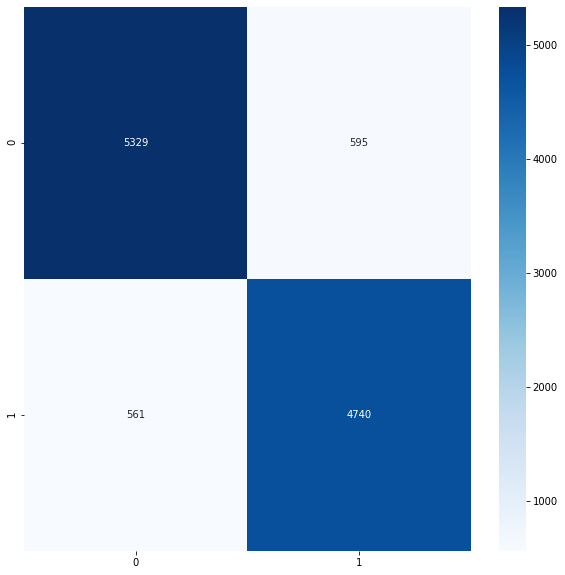

In [71]:
#0.7
plt.figure(figsize = (10,10))
sns.heatmap(cm_cv,cmap= "Blues",annot = True, fmt='')

In [ ]:
# confusion_matrix(pred,y_test)


                     #Actual Negative    #Actual Positive                          #y_test(second variable)
#Predicted Negative   True Negative       False Negative
#Predicted Positive   False Positive      True Positive
    
    
    
#pred(first variable)

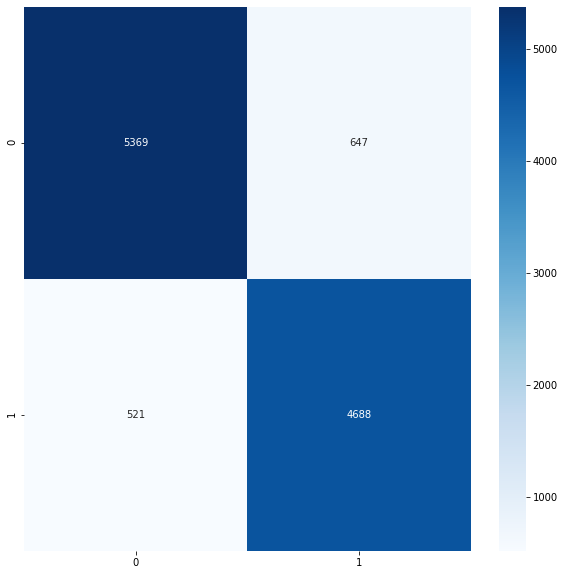

In [75]:
#0.8
plt.figure(figsize = (10,10))
sns.heatmap(cm_cv,cmap= "Blues",annot = True, fmt='')

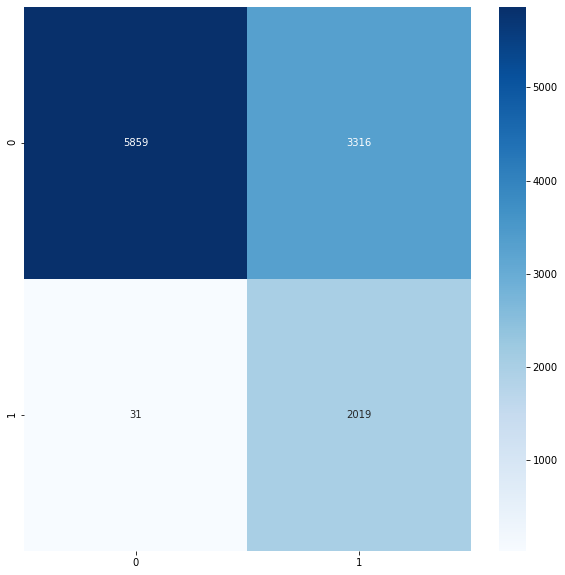

In [88]:
#0.9999
plt.figure(figsize = (10,10))
sns.heatmap(cm_cv1,cmap= "Blues",annot = True, fmt='')